In [1]:
%run generate_matrices_tools.ipynb     # importing functions

[-1  2]
[-2 -1] :  B
[5 0]
[0 5] :  G
(0, 1) :  lincomb_LLL
(0.00000, 1.0000) :  lincomb_cube
(-2, -1) :  sv_LLL
(-2.0000, -1.0000) :  sv_cube
(0.00000, 0.00000) :  lincomb_diff
[0.0 0.0]
[0.0 0.0] :  Diff impact

[ 2 -2]
[-1  2] :  B
[ 8 -6]
[-6  5] :  G
(1, 1) :  lincomb_LLL
(0.75000, 1.0000) :  lincomb_cube
(1, 0) :  sv_LLL
(0.50000, 0.50000) :  sv_cube
(0.25000, 0.00000) :  lincomb_diff
[ 0.5 -0.0]
[-0.0  0.0] :  Diff impact

[ 1  0]
[ 0 -2] :  B
[1 0]
[0 4] :  G
(1, 0) :  lincomb_LLL
(1.0000, 0.00000) :  lincomb_cube
(1, 0) :  sv_LLL
(1.0000, 0.00000) :  sv_cube
(0.00000, 0.00000) :  lincomb_diff
[0.0 0.0]
[0.0 0.0] :  Diff impact

[ 0 -2]
[ 2 -2] :  B
[4 4]
[4 8] :  G
(1, 0) :  lincomb_LLL
(1.0000, -0.50000) :  lincomb_cube
(0, -2) :  sv_LLL
(-1.0000, -1.0000) :  sv_cube
(0.00000, 0.50000) :  lincomb_diff
[0.0 0.0]
[0.0 2.0] :  Diff impact

[ 2 -2]
[ 0 -1] :  B
[8 2]
[2 1] :  G
(0, 1) :  lincomb_LLL
(-0.25000, 1.0000) :  lincomb_cube
(0, -1) :  sv_LLL
(-0.50000, -0.50000) :  sv_c

In [71]:
def hessian_check(jsonfilename):
    cases = from_json(jsonfilename)
    dimension = len(cases[0]["B"])
    positive, negative, zero = 0, 0, 0
    for case in cases:
        B, G, lc_cube, lc_LLL = case["B"],case["G"], case["lincomb_cube"], case["lincomb_LLL"]
        x_1, x_2, x_3, x_4, x_5, x_6 = var('x_1, x_2, x_3, x_4, x_5, x_6')
        norm_function = vector([x_1, x_2, x_3, x_4, x_5, x_6]) * matrix(G) * matrix([x_1, x_2, x_3, x_4, x_5, x_6]).transpose()
        hesse = jacobian(jacobian(norm_function, (x_1, x_2, x_3, x_4, x_5, x_6)), (x_1, x_2, x_3, x_4, x_5, x_6))
        determinant = hesse.det()
        if determinant > 0: positive += 1
        elif determinant == 0: zero += 1
        else: negative += 1
    return positive, negative, zero

# for i in range(dimension):
# b = []
# A = deepcopy(G)
# A.pop(i)
# for row in range(len(mat)):
#     A[row].pop(i)
# print(matrix(A))
# for row in range(dimension):
#     if row != i:
#         b.append(G[row][i])
# print("b", (b))
# # now wed solve Ax = - b and recieve tｈe minimum
    
# print(lc_cube)


hessian_check("matrices6x6-12000instances.json")

(6023, 0, 0)

It seems that the hessian is indeed always positive. Not sure why (smilin paraboles prolly?) but thats what I wanted so ok

In [91]:
# def gradie(jsonfilename):
#     cases = from_json(jsonfilename)
#     dimension = len(cases[0]["B"])
#     positive, negative, zero = 0, 0, 0
#     for case in cases: 
#         B, G, lc_cube, lc_LLL = case["B"], case["G"], case["lincomb_cube"], case["lincomb_LLL"]
#         x_1, x_2, x_3 = var('x_1, x_2, x_3')
#         norm_function = vector([x_1, x_2, x_3]) * matrix(G) * matrix([x_1, x_2, x_3]).transpose()
#         gradient = []
#         for x in [x_1, x_2, x_3]:
#             gradient.append(diff(norm_function, x))
#         gradient = matrix(gradient)
#         stationary_points = (gradient.solve_right(zero_vector(dimension)))
#         print(stationary_points)
#     return positive, negative, zero

# gradie("dummyfile.json")

# no a proto nemuzu rovnou hledat minimum

(0)
(0)
(0)
(0)
(0)


(0, 0, 0)

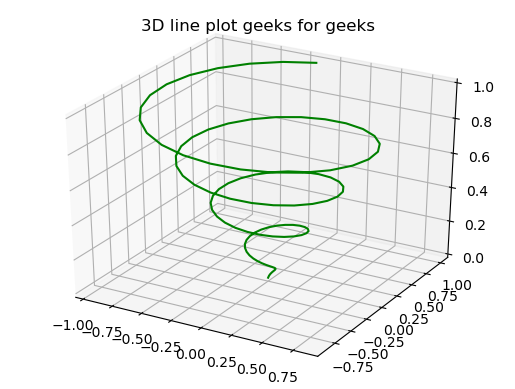

In [3]:
# importing mplot3d toolkits, numpy and matplotlib
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# defining all 3 axis
z = np.linspace(0, 1, 100)
x = z * np.sin(25 * z)
y = z * np.cos(25 * z)

# plotting
ax.plot3D(x, y, z, 'green')
ax.set_title('3D line plot geeks for geeks')
plt.show()
